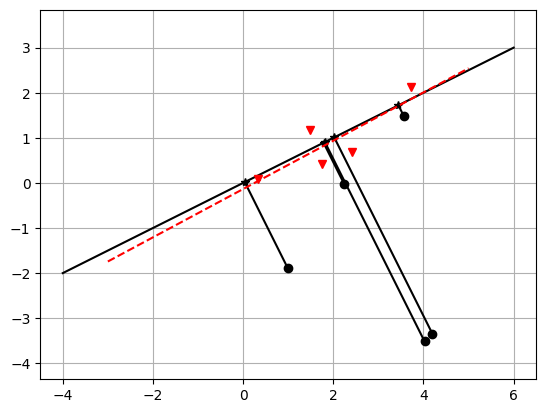

In [15]:
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt

# Partie A
plt.figure(1)

n = 5    # nombre de points
x = -3 + 8 * np.random.rand(n)  # abscisses (compris entre -3 et 5)
y = -4 + 7 * np.random.rand(n)  # ordonnées (compris entre -4 et 3)
plt.plot(x, y, 'ok')  # affichage des points (cercles noirs)

# Création de la matrice 2xN
U = np.vstack((x, y))

# droite d'équation z(t) = 0.5 * t
t = np.array([-4, 6])  # abscisses
z = t / 2              # ordonnées
plt.plot(t, z, 'k')    # affichage de la droite (trait continu)

# propriétés du repère
plt.axis([-3, 5, -4, 3])
plt.grid(True)
plt.axis('equal')

# vecteur directeur de la droite (direction de la droite y = 0.5 * x)
N = np.array([1, 0.5])

# matrice de projections sur la droite
P = (U.T @ N) / np.linalg.norm(N)**2  # Projection des points sur la droite

# initialisation de la matrice 2xN contenant les abscisses (1ère ligne)
# et les ordonnées (2ème ligne) des points projetés sur la droite
V = np.zeros((2, n))

# calcul des coordonnées des points projetés (BOUCLE FOR OBLIGATOIRE)
for k in range(n):
    V[:, k] = (np.dot(U[:, k], N) / np.linalg.norm(N)**2) * N  # Projection de chaque point

# affichage des points projetés (étoiles noires)
plt.plot(V[0, :], V[1, :], '*k')

# on relie les points initiaux à leurs projections
for k in range(n):
    plt.plot([x[k], V[0, k]], [y[k], V[1, k]], 'k')

# on perturbe les coordonnées des points projetés
delta = 0.5
dV = -delta + 2 * delta * np.random.rand(2, n)
W = V + dV

# affichage des points perturbés (triangles noirs)
plt.plot(W[0, :], W[1, :], 'vr')

# calcul de la droite passant au plus près des points perturbés
# Nous utilisons la méthode des moindres carrés
A = np.vstack((W[0, :], np.ones(n))).T
v = v = np.linalg.inv(A.T @ A) @ A.T @ W[1, :]

# affichage de la droite (en pointillés)
x_vals = np.linspace(-3, 5, 100)
y_vals = v[0] * x_vals + v[1]
plt.plot(x_vals, y_vals, 'r--')

plt.show()


